In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("//content//Data Normalization 2nd Milestone Week--4.csv",encoding='utf')

In [3]:
df.shape

(3380, 169)

In [4]:
df.head()

,id,budget,movie_url,imdb_id,movie_title,overview,popularity,poster_path,production_companies,runtime,...,Slovakia,Italy,Malaysia,Lebanon,India,Puerto Rico,Norway,Peru,Austria,Soviet Union
0,653346,160000000.0,https://www.20thcenturystudios.com/movies/king...,tt11389872,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,6245.898,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,"20th Century Studios, Oddball Entertainment, J...",145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,929590,50000000.0,https://a24films.com/films/civil-war,tt17279496,Civil War,"In the near future, a group of war journalists...",2730.901,/sh7Rg8Er3tFcN9BpKIPOMvALgZd.jpg,"DNA Films, IPR.VC, A24",109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,823464,150000000.0,https://www.godzillaxkongmovie.com,tt14539740,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2726.153,/z1p34vh7dEOnLDmyCrlUVLuoDzd.jpg,Legendary Pictures,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,719221,8000000.0,https://www.tarotmovie.com,tt14088510,Tarot,When a group of friends recklessly violate the...,2349.378,/gAEUXC37vl1SnM7PXsHTF23I2vq.jpg,"Screen Gems, Alloy Entertainment, Ground Contr...",92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,573435,100000000.0,https://www.badboys.movie,tt4919268,Bad Boys: Ride or Die,"After their late former Captain is framed, Low...",2486.516,/nP6RliHjxsz4irTKsxe8FRhKZYl.jpg,"Westbrook Studios, Columbia Pictures, Don Simp...",115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(3380, 169)

In [6]:
df.isnull().sum()

id              0
budget          1
movie_url       1
imdb_id         1
movie_title     1
               ..
Puerto Rico     1
Norway          1
Peru            1
Austria         1
Soviet Union    1
Length: 169, dtype: int64

In [7]:
import requests
import time
def fetch_movie_tagline(imdb_id, api_key, max_retries=3, delay=1):
    url = f"https://api.themoviedb.org/3/find/{imdb_id}"
    params = {
        'api_key': api_key,
        'external_source': 'imdb_id'
    }

    for attempt in range(1, max_retries + 1):
        response = requests.get(url, params=params)

        if response.status_code == 200:
            data = response.json()
            if data['movie_results']:
                movie = data['movie_results'][0]
                tagline = movie.get("tagline", "N/A")
                return tagline
            else:
                print(f"Movie not found for IMDb ID: {imdb_id} (Attempt {attempt}/{max_retries})")
        else:
            print(f"API request failed with status code: {response.status_code} (Attempt {attempt}/{max_retries})")
            # Consider implementing more specific error handling based on status code

        time.sleep(delay)

    return None

# Replace with your TMDB API key
api_key = 'b95c9fdd84a97ae3467206de8b62cfe7'

# Assuming your DataFrame is named 'df' and has an 'imdb_id' column
for index, row in df.iterrows():
    # Check for missing data in 'tagline' column
    if pd.isnull(row['tagline']):
        imdb_id = row['imdb_id']

        # Fetch movie tagline with error handling and retry logic
        tagline = fetch_movie_tagline(imdb_id, api_key)

        # Update DataFrame with fetched tagline (consider data validation if needed)
        if tagline:
            df.at[index, 'tagline'] = tagline


Movie not found for IMDb ID: nan (Attempt 1/3)
Movie not found for IMDb ID: nan (Attempt 2/3)
Movie not found for IMDb ID: nan (Attempt 3/3)


In [8]:
df['tagline'].isnull().sum()

1

In [9]:
mode=df['tagline'].mode()[0]
df['tagline']=df['tagline'].fillna(mode)

In [10]:
df['tagline'].isnull().sum()

0

In [11]:
ignores=['id', 'movie_url', 'imdb_id', 'movie_title', 'overview','keywords',
         'poster_path','cast','crew','tagline','spoken_languages']

In [12]:
pip install pycaret[full]

In [13]:
from pycaret.regression import *

**setup**
The setup function in PyCaret is essential for initializing the machine learning environment and preparing your data for modeling. It's the first step before using other PyCaret functionalities. Here's a breakdown of a simple definition for setup:

In [14]:
exp=setup(data=df,target='revenue',session_id=True,train_size=0.7,ignore_features=ignores,
          preprocess=True,numeric_imputation='mean',categorical_imputation='median',
          remove_outliers=True,outliers_threshold=0.05,outliers_method='iforest',
          normalize=True,normalize_method='zscore'
          )

,Description,Value
0,Session id,1
1,Target,revenue
2,Target type,Regression
3,Original data shape,"(3380, 169)"
4,Transformed data shape,"(3261, 158)"
5,Transformed train set shape,"(2247, 158)"
6,Transformed test set shape,"(1014, 158)"
7,Ignore features,11
8,Numeric features,155
9,Categorical features,2


**compare model**
compare_models is a powerful tool for evaluating multiple models and identifying the best performing one for your task.
It provides a concise comparison table, simplifying model selection.
By default, it selects the top model based on a specific metric (accuracy for classification, R-squared for regression). You can adjust this behavior using the n_select parameter.

In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [16]:
best=compare_models(n_select=1,sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,115791563.5626,31540086485447948.0000,176281925.4763,0.3359,1.9068,606.0651,0.6590
knn,K Neighbors Regressor,109599119.2000,32437423104956824.0000,178739630.4000,0.3157,1.7502,538.4263,0.3700
ada,AdaBoost Regressor,127622072.8779,42335466990801696.0000,204539190.5589,0.1065,1.9529,692.3629,0.6980
lasso,Lasso Regression,135099787.3631,43317089800599104.0000,206583994.4161,0.0912,2.0097,768.7382,0.3780
omp,Orthogonal Matching Pursuit,135259266.6565,43392948876725880.0000,206757812.2138,0.0898,2.0143,775.2647,0.9640
ridge,Ridge Regression,135584778.3046,43382136946502416.0000,206768252.6639,0.0894,2.0150,768.1925,0.4120
lightgbm,Light Gradient Boosting Machine,136688255.1043,44193230363339664.0000,208921154.5760,0.0694,2.0211,802.3597,2.3120
et,Extra Trees Regressor,137330353.7172,44703060245798920.0000,210226071.2219,0.0569,2.0282,798.2306,3.1830
gbr,Gradient Boosting Regressor,137733772.1983,45131216697716128.0000,211183569.9248,0.0482,2.0289,812.4103,1.2630
catboost,CatBoost Regressor,136678649.4725,45248436386573064.0000,211532604.4698,0.0449,2.0219,836.6783,6.7440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [17]:
print(best)

ElasticNet(random_state=1)


**create model**
This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [18]:
en=create_model('en')
en

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,108636294.3288,23867579262679912.0000,154491356.5954,0.4157,1.9384,52.1810
1,110950560.5794,27048737740657912.0000,164465004.6078,0.3754,2.0857,146.3885
2,130306010.7233,49038469899174872.0000,221446313.8081,0.2980,1.8182,41.1229
3,119211162.5368,33611982907219740.0000,183335710.9437,0.3322,1.8376,17.5045
4,119494096.1578,28561915359830648.0000,169002708.1435,0.4393,2.0933,220.4627
5,109699859.3679,28337153841932228.0000,168336430.5251,0.2828,1.9153,418.8746
6,123194767.7288,31579182553821288.0000,177705325.0576,0.3660,1.8173,18.9381
7,109619240.3366,27607891457721504.0000,166156226.0577,0.3546,2.0137,4987.9086
8,120399915.9501,43334981168594400.0000,208170557.8813,0.1878,1.7396,16.2016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ElasticNet(random_state=1)

In [19]:
print(en)

ElasticNet(random_state=1)


**tune model**
This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [20]:
tuned_en=tune_model(en)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,107282554.9838,23584232534651916.0000,153571587.6543,0.4226,1.9215,50.8916
1,109530466.4328,26634035359805444.0000,163199373.0374,0.3850,2.0726,145.2690
2,128138535.9088,48176901952134912.0000,219492373.3348,0.3103,1.8060,41.4425
3,117823879.1291,33003498946470524.0000,181668651.5238,0.3443,1.8139,16.7097
4,118307919.0419,28701732964891672.0000,169415858.0679,0.4365,2.0739,228.0575
5,108028234.5514,27699136370460576.0000,166430575.2272,0.2989,1.8998,409.4081
6,121228519.0368,31050553063157932.0000,176211671.1888,0.3766,1.8022,18.6765
7,108647987.7662,27476636690881076.0000,165760781.5223,0.3577,1.9982,4880.5153
8,119600116.1694,43686721649839312.0000,209013687.7093,0.1812,1.7266,16.3006


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
print(tuned_en)

ElasticNet(alpha=5.41, l1_ratio=0.825999999999999, random_state=1)


 **plot model**
 This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases.

List of available plots (ID - Name):

‘pipeline’ - Schematic drawing of the preprocessing pipeline

‘auc’ - Area Under the Curve

‘threshold’ - Discrimination Threshold

‘pr’ - Precision Recall Curve

‘confusion_matrix’ - Confusion Matrix

‘error’ - Class Prediction Error

‘class_report’ - Classification Report

‘boundary’ - Decision Boundary

‘rfe’ - Recursive Feature Selection

‘learning’ - Learning Curve

‘manifold’ - Manifold Learning

‘calibration’ - Calibration Curve

‘vc’ - Validation Curve

‘dimension’ - Dimension Learning

‘feature’ - Feature Importance

‘feature_all’ - Feature Importance (All)

‘parameter’ - Model Hyperparameter

‘lift’ - Lift Curve

‘gain’ - Gain Chart

‘tree’ - Decision Tree

‘ks’ - KS Statistic Plot

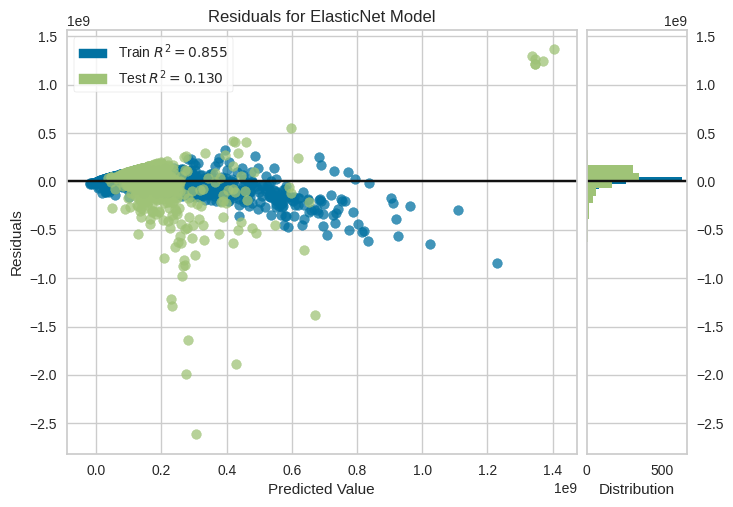

In [22]:
plot_model(tuned_en)

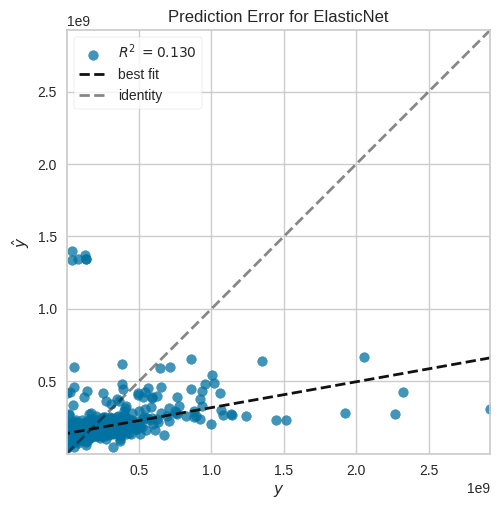

In [23]:
plot_model(tuned_en,plot='error')

In [24]:
final_model=finalize_model(tuned_en)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['budget', 'popularity', 'runtime',
                                             'release_day', 'release_month',
                                             'release_year', 'Horror',
                                             'Mystery', 'Music', 'Thriller',
                                             'TV Movie', 'Science Fiction',
                                             'Western', 'History', 'Romance',
                                             'Action', 'Crime', 'Animation',
                                             'War', 'Family', 'Comedy',
                                             'Documentary', 'Adventure',
                                             'Dram...
                                    transformer=TargetEncoder(cols=['production_companies',
                                                                    'title'],
                  

**evalute model**

This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

In [25]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**finalize model**

In [26]:
#final_model=finalize_model(best)
""" it will give an error because we manully select the best"""
#final_model

' it will give an error because we manully select the best'

**prect model**
This function predicts Label and Score (probability of predicted class) using a trained model. When data is None, it predicts label and score on the holdout set.

In [27]:
prediction=predict_model(final_model)
prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,325349824.8000,10030648028419082240.0000,3167119831.7113,-160.1237,1.9366,114.7668


,budget,popularity,production_companies,runtime,title,release_day,release_month,release_year,Horror,Mystery,...,Malaysia,Lebanon,India,Puerto Rico,Norway,Peru,Austria,Soviet Union,revenue,prediction_label
330,20000000.0,94.964996,"Living Films, Black Bear Pictures, Boies/Schil...",121.0,Gold,3.0,2.0,2016.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14880939.0,1.371527e+08
2425,55000000.0,38.796001,"Screen Gems, Bedford Falls Productions",119.0,Burlesque,23.0,11.0,2010.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89500000.0,1.602268e+08
99,200000000.0,182.977005,"Genre Films, Hutch Parker Entertainment, 20th ...",114.0,Dark Phoenix,5.0,6.0,2019.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252442976.0,2.719982e+08
945,20000000.0,57.497002,"Columbia Pictures, Apatow Productions",113.0,Superbad,20.0,3.0,2007.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170800000.0,1.391185e+08
586,14000000.0,88.130997,"Phantom Four, Spyglass Media Group",121.0,Hellraiser,28.0,9.0,2022.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132965488.0,1.358540e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,65000000.0,23.454000,"Lionsgate, Lakeshore Entertainment, Sidney Kim...",92.0,"I, Frankenstein",22.0,1.0,2014.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76801176.0,1.343829e+08
2583,150000000.0,27.367001,"Universal Pictures, Relativity Media, Stuber P...",102.0,The Wolfman,10.0,2.0,2010.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140700000.0,1.730252e+08
480,92000000.0,63.719002,"Warner Bros. Pictures, Universal Pictures, Amb...",113.0,Twister,10.0,5.0,1996.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,494471520.0,1.993293e+08
3001,11000000.0,19.989000,"Palo Vista Productions, Peter V. Miller Invest...",120.0,My Cousin Vinny,13.0,3.0,1992.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64088552.0,1.346618e+08


In [28]:
prediction['prediction_label']=prediction['prediction_label'].round()
prediction['revenue']=prediction['revenue'].round()

In [29]:
prediction['prediction_label']=prediction['prediction_label'].astype(int)
prediction['revenue']=prediction['revenue'].astype(int)

In [30]:
predictions=prediction[['revenue','prediction_label']]
predictions

,revenue,prediction_label
330,14880939,137152735
2425,89500000,160226770
99,252442976,271998182
945,170800000,139118502
586,132965488,135854006
...,...,...
2501,76801176,134382857
2583,140700000,173025173
480,494471520,199329300
3001,64088552,134661849


In [31]:
predictions=predictions.reset_index(drop=True)
predictions

,revenue,prediction_label
0,14880939,137152735
1,89500000,160226770
2,252442976,271998182
3,170800000,139118502
4,132965488,135854006
...,...,...
1009,76801176,134382857
1010,140700000,173025173
1011,494471520,199329300
1012,64088552,134661849


**save model**
This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [32]:
saved_model=save_model(final_model,'/content/drive/MyDrive/Final_model_en')

Transformation Pipeline and Model Successfully Saved


 **load model**
 This function loads a previously saved pipeline.